# Excercises 1.C
## Goal for this excercise:
### Using the make circles library we would like to train a classifier that can make a classification of the dataset
### We would like to use the following classifiers: SVM With Linear, Rbf and Polynomial kernels

In [1]:
#Imports
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# To be able to create 3D plots we need to have a feature map that we can set out Z value to, this is done with the following functions
# Inspiration take from SVM_1 Excercise

In [3]:
def feature_map_3(X):
    return np.asarray((np.sqrt(2) * X[:, 0] * X[:, 1], X[:, 0] ** 2, X[:, 1] ** 2)).T


In [4]:
#Create dataset wiht the make circles library

In [5]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.1)
Z = feature_map_3(X)

In [6]:
#Type in the dataset to see what it looks like

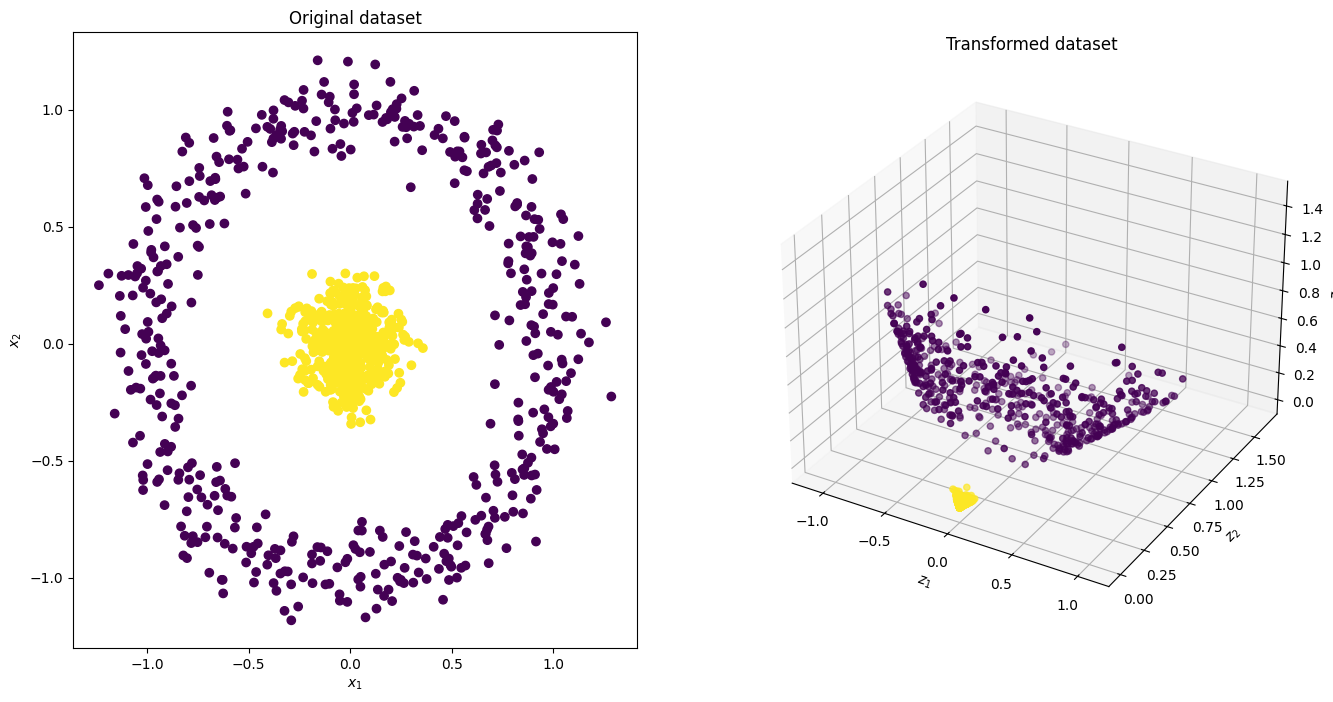

In [7]:
# 2D scatter plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

# 3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2], c=y,
             cmap='viridis')
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')

plt.show()

In [8]:
def plot2dSVM(kernel, h, name):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    plt.subplot(1, 1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
     
    Z = kernel.predict(np.c_[xx.ravel(), yy.ravel()])
     
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
     
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title("SVC with " + name + " kernel")

    plt.show()

# Linear Kernel
- The linear kernel is the simplest kernel function. It is given by the inner product <x,x'>. It is not nonlinear, and therefore does not map the input data into a higher dimensional space. It is selected when the data is linearly separable.
- Trying to plot the linear kernel on the dataset and showing it in 3 dimensions so as to see the seperation meshgrid.

w= [ 0.00553247 -3.63170829 -3.55479303] b= [1.3476769]


(-0.9, 1.1)

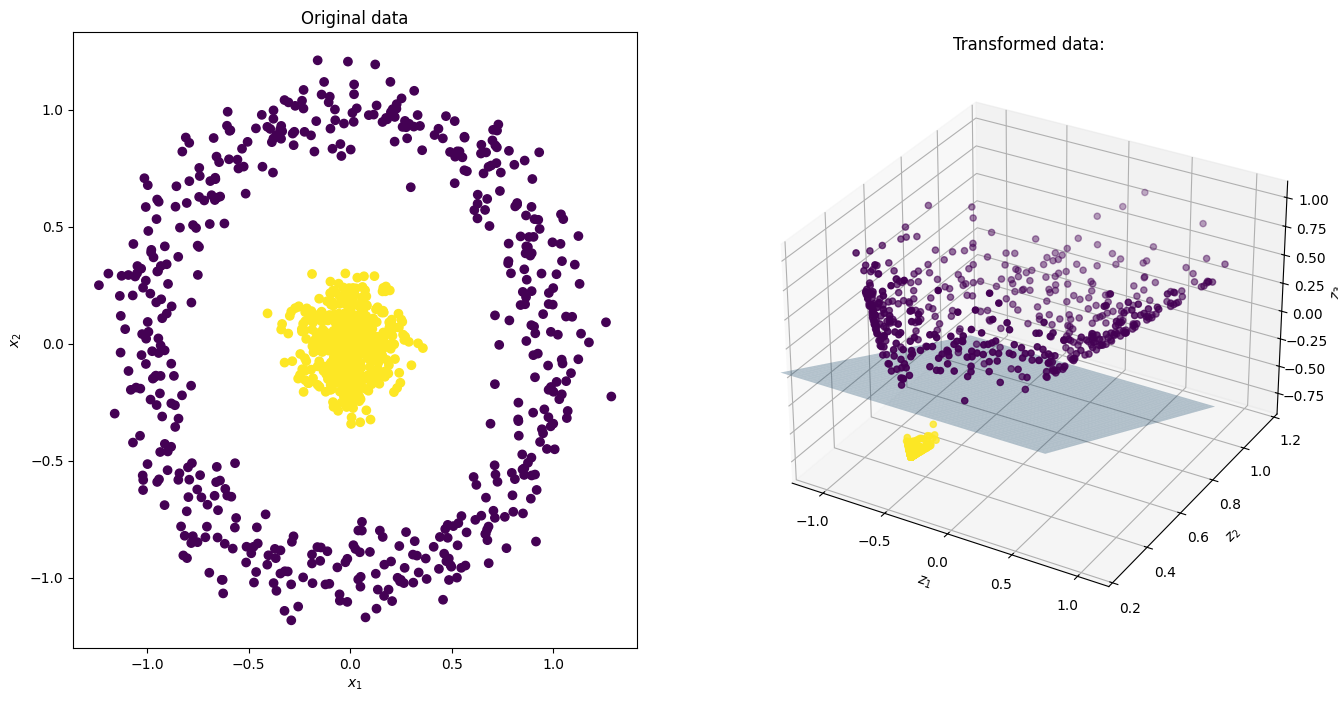

In [9]:
Z = feature_map_3(X)
C = 1 # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(Z, y)

#Display Linear Kernel
#displayKernel3D(svc, z, y, 0.1)
# 2D scatter plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original data')

# 3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2], c=y,
             cmap='viridis')  # ,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')

ax.set_title('Transformed data: ')
w = svc.coef_.flatten()
b = svc.intercept_.flatten()
print('w=', w, 'b=', b)

# create x,y
xx, yy = np.meshgrid(np.linspace(-1, 1), np.linspace(0, 1))

# calculate corresponding z
boundary = (-w[0] * xx - w[1] * yy - b) * 1. / w[2]

# plot the surface

ax.plot_surface(xx, yy, boundary, alpha=.3)
ax.set_ylim(.2, 1.2)
ax.set_zlim(-.9, 1.1)

In [10]:
# Score for using the linear kernel on the dataset

In [11]:
print(svc.score(Z, y))

1.0


In [12]:
# Display the linear kernel in 2D

# SVM Classification
- Three different SVM classifiers are applied to the dataset with different kernels: Linear, RBF (Radial Basis Function), and Poly (Polynomial). Each classifier is trained and then evaluated for accuracy using the score method.

## Linear Kernel different solution

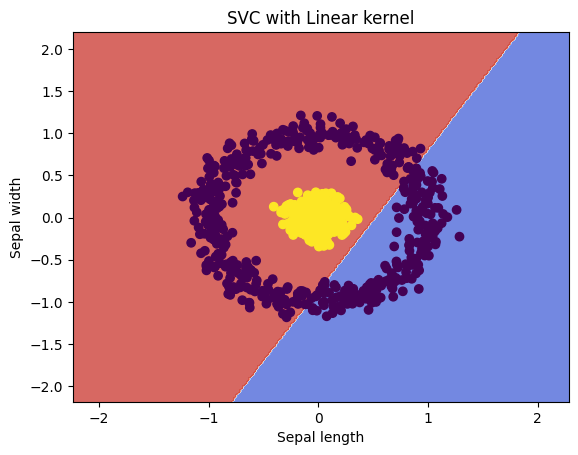

Score For the Linear Kernel:  0.681


In [13]:
clf = SVC(kernel='linear')
clf.fit(X, y)
plot2dSVM(clf, 0.02, "Linear")
print("Score For the Linear Kernel: ", clf.score(X, y))

# RBF Kernel

In [14]:
rbf_svc = SVC(kernel='rbf', gamma=100, C=C).fit(X, y)

In [15]:
# Display RBF kernel

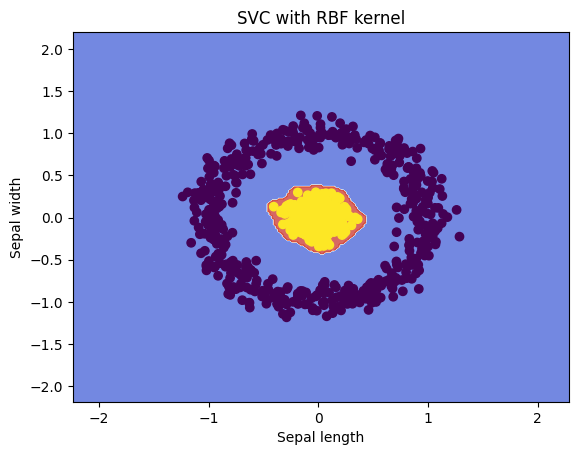

Score For the RBF Kernel:  1.0


In [16]:
plot2dSVM(rbf_svc, 0.02, "RBF")
print("Score For the RBF Kernel: ", rbf_svc.score(X, y))

# Display poly kernel

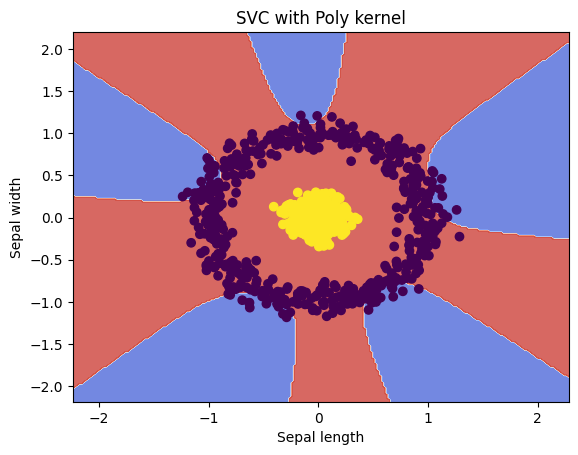

Score For the Poly Kernel:  0.568


In [17]:
poly_svc = SVC(kernel='poly', degree=7, C=C).fit(X, y)
plot2dSVM(poly_svc, 0.02, "Poly")
print("Score For the Poly Kernel: ", poly_svc.score(X, y))

# Kernel Comparisons
- The results of each SVM kernel are compared based on their accuracy scores. Here are the scores:
Linear Kernel: Score of 0.68
RBF Kernel: Score of 1.0 (perfect accuracy)
Polynomial Kernel: Score of 0.574

 # Conclusion
- The results of each SVM kernel are compared based on their accuracy scores. Here are the scores
- - Linear Kernel: Score of 0.68
- - RBF Kernel: Score of 1.0 (perfect accuracy)
- - Polynomial Kernel: Score of 0.574
This assignment was done implemeting a 3D visual to see how a seperation of the dataset would look like. The dataset was then seperated using the different kernels and the results were compared.
- Even though the RBF kernel did flawlessly with a perfect accuracy it is important to notice that it is very specific to that dataset and might not be able to perform as well on new values being added to the mix.